In [1]:
#OpenCV library-- Open Source Computer Vision Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def str2bin(text):
    binary= []
    for i in text:
        binary.append(format(ord(i), '08b'))
    return binary

In [3]:
def bin2str(text_bin):
    text= ''
    for i in range(0, len(text_bin), 8):
        binary= text_bin[i:i+8]
        text+= chr(int(binary, 2))
    return text

In [4]:
def show_img(img):
    plt.imshow(img, cmap= 'gray')
    plt.show()

# Steganography Text

In [5]:
def encode_text():
    #Reading file in grayscale
    ip= input('Enter image file(in grayscale): ')
    data= cv2.imread(ip, 0)
    img= data.copy()
    
    text= input('Enter text to be encoded: ') 
    text_bin= str2bin(text)
    text_bin_comb= "0".join(text_bin)+ "1"   #Last 1 for termination
    
    #Encoding Text 
    bit= 0
    for i in range(img.shape[0]):
        j= 0
        while j<img.shape[1] and bit<len(text_bin_comb):
            if text_bin_comb[bit]=='1' and img[i][j]%2==0:
                img[i][j]= (img[i][j]+1)%256
            elif text_bin_comb[bit]=='0' and img[i][j]%2!=0:
                img[i][j]= (img[i][j]-1)%256
            j+= 1
            bit+= 1
        if bit>= len(text_bin_comb):
            break
    else:
        print("Image is too small to encode given input data")
        return
    
    #Saving File
    out= input('Enter output image file: ')
    cv2.imwrite(out, img)

In [6]:
def decode_text():
    ip= input('Enter image file(in grayscale): ')
    img= cv2.imread(ip, 0)
    
    text_bin= ''
    bit= 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if bit==8 and img[i][j]%2==0:
                bit=0
                continue
            elif bit==8 and img[i][j]%2!= 0:
                break
            
            if img[i][j]%2==0:
                text_bin+= '0'
            else:
                text_bin+= '1'
            bit+= 1
        else:
            continue
        break
    
    text= bin2str(text_bin)
    return text

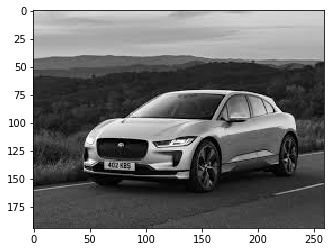

In [8]:
show_img(cv2.imread('./Images/car.jpg', 0))

In [9]:
encode_text()

Enter image file(in grayscale): ./Images/car.jpg
Enter text to be encoded: github.com
Enter output image file: ./Images/car_hidden_data.png


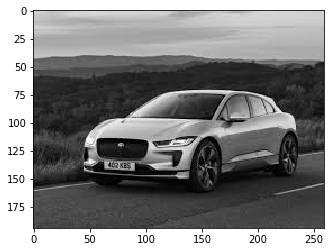

In [10]:
show_img(cv2.imread('./Images/car_hidden_data.png', 0))

In [11]:
decode_text()

Enter image file(in grayscale): ./Images/car_hidden_data.png


'github.com'

# Steganography Image

In [12]:
def encode_img():
    #Reading file in grayscale
    ip= input('Enter image file(in grayscale): ')
    data= cv2.imread(ip, 0)
    img= data.copy()
    
    pt= input('Enter image file(in grayscale) to be encoded: ') 
    pt_data= cv2.imread(pt, 0)
    text_bin_comb= ""
    for i in range(pt_data.shape[0]):
        for j in range(pt_data.shape[1]):
            text_bin= format(pt_data[i][j], '08b')+ "0"
            text_bin_comb+= text_bin 
    text_bin_comb+=  (format(pt_data.shape[0], '08b') + '0' + format(pt_data.shape[1], '08b') + "1")
    
    #Encoding Text 
    bit= 0
    for i in range(img.shape[0]):
        j= 0
        while j<img.shape[1] and bit<len(text_bin_comb):
            if text_bin_comb[bit]=='1' and img[i][j]%2==0:
                img[i][j]= (img[i][j]+1)%256
            elif text_bin_comb[bit]=='0' and img[i][j]%2!=0:
                img[i][j]= (img[i][j]-1)%256
            j+= 1
            bit+= 1
        if bit>= len(text_bin_comb):
            break
    else:
        print("Image is too small to encode given input image")
        return
    
    #Saving File
    out= input('Enter output image file: ')
    cv2.imwrite(out, img)

In [13]:
def decode_img():
    ip= input('Enter image file(in grayscale): ')
    img= cv2.imread(ip, 0)
    
    text_bin= ''
    bit= 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if bit==8 and img[i][j]%2==0:
                bit=0
                continue
            elif bit==8 and img[i][j]%2!= 0:
                break
            
            if img[i][j]%2==0:
                text_bin+= '0'
            else:
                text_bin+= '1'
            bit+= 1
        else:
            continue
        break
    img_array= []
    for i in range(0, len(text_bin), 8):
        binary= text_bin[i:i+8]
        img_array.append(int(binary, 2))
    cols= img_array[-1]
    rows= img_array[-2]
    img_array.pop(-1)
    img_array.pop(-1)
    img_array= np.array(img_array)
    img_array= img_array.reshape(rows, cols)
    
    out= input('Enter output image file name(in png): ')
    cv2.imwrite(out, img_array)


In [14]:
# rd= cv2.imread('scenary.png', 0)
# cv2.imwrite('scenary_gray.png', rd)
# rd= cv2.imread('flower.jpg', 0)
# cv2.imwrite('flower_gray.png', cv2.resize(rd, (32, 32)))

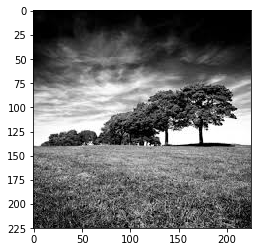

(225, 225)

In [15]:
show_img(cv2.imread('./Images/scenary.png', 0))
cv2.imread('./Images/scenary.png', 0).shape

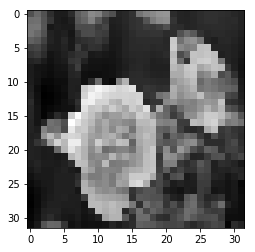

In [16]:
show_img(cv2.imread('./Images/flower_gray.png', 0))

In [17]:
encode_img()

Enter image file(in grayscale): ./Images/scenary.png
Enter image file(in grayscale) to be encoded: ./Images/flower_gray.png
Enter output image file: ./Images/scenary_hidden_img.png


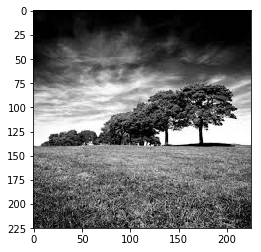

In [18]:
show_img(cv2.imread('./Images/scenary_hidden_img.png', 0))

In [19]:
decode_img()

Enter image file(in grayscale): ./Images/scenary_hidden_img.png
Enter output image file name(in png): ./Images/flower_decoded.png


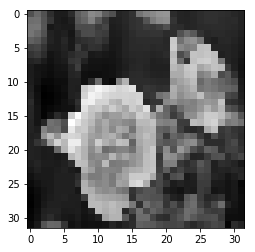

In [20]:
show_img(cv2.imread('./Images/flower_decoded.png', 0))